In [ ]:
from zipfile import ZipFile
import os

# Paths to the zip file and the extraction directory
zip_file_path = '/content/drive/MyDrive/Footwear.zip'
extraction_directory = '/content/drive/MyDrive/Footwear/'

# Create the extraction directory if it does not exist
if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

# Extract the zip file
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

# List the extracted files
extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

# Correct the path to include the 'Footwear' directory and list its contents
extraction_directory_updated = os.path.join(extraction_directory, 'Footwear')
extracted_files_updated = os.listdir(extraction_directory_updated)
print(extracted_files_updated[:10], len(extracted_files_updated))


['Footwear']
['02109.jpg', '0363.jpg', '1051520A_NUDE_ELLE_DVP.jpg', '1055211A_BEIGE.jpg', '1080917A_BEIGE.jpg', '1116902C_OFF_WHITE_LEE_COOPER_DVP.jpg', '1151250A_WHITE.jpg', '1152650A_WHITE_MISSY_DVP.jpg', '1155104A_Black_MISSY_DVP.jpg', '1156612A_WHITE.jpg'] 395


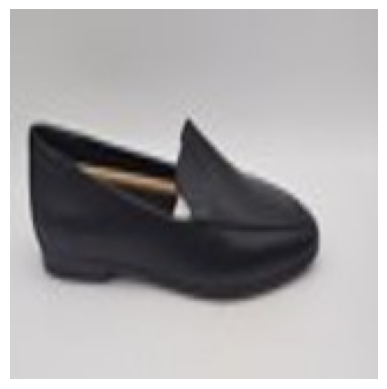

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Function to load and display an image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Display the first image
first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[0])
display_image(first_image_path)


In [ ]:
import glob

# Directory path containing your images
image_directory = extraction_directory_updated

# List all image file paths
image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# Print the list of image file paths
print(image_paths_list)


['/content/drive/MyDrive/Footwear/Footwear/02109.jpg', '/content/drive/MyDrive/Footwear/Footwear/0363.jpg', '/content/drive/MyDrive/Footwear/Footwear/1051520A_NUDE_ELLE_DVP.jpg', '/content/drive/MyDrive/Footwear/Footwear/1055211A_BEIGE.jpg', '/content/drive/MyDrive/Footwear/Footwear/1080917A_BEIGE.jpg', '/content/drive/MyDrive/Footwear/Footwear/1116902C_OFF_WHITE_LEE_COOPER_DVP.jpg', '/content/drive/MyDrive/Footwear/Footwear/1151250A_WHITE.jpg', '/content/drive/MyDrive/Footwear/Footwear/1152650A_WHITE_MISSY_DVP.jpg', '/content/drive/MyDrive/Footwear/Footwear/1155104A_Black_MISSY_DVP.jpg', '/content/drive/MyDrive/Footwear/Footwear/1156612A_WHITE.jpg', '/content/drive/MyDrive/Footwear/Footwear/1157105A_BURGUNDY.jpg', '/content/drive/MyDrive/Footwear/Footwear/1210016A_OFF__WHITE_LILAC_LEE_COOPER__DVP.jpg', '/content/drive/MyDrive/Footwear/Footwear/1211903A_WHITE_LEE_COOPER_DVP.jpg', '/content/drive/MyDrive/Footwear/Footwear/1217550A_BLACK_MISSY_DVP.jpg', '/content/drive/MyDrive/Footwear/F

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to preprocess an image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

# Function to extract features from an image
def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

# Extract features for all images and store them
all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))


1/1 [==============================] - 0s 466ms/step


In [ ]:
from scipy.spatial.distance import cosine

# Function to recommend similar images based on cosine similarity
def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=4):
    # Preprocess the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # Calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n-1:-1][::-1]

    # Display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # Display similar images
    for i, idx in enumerate(similar_indices, start=1):
        image_path = os.path.join(image_directory, all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"similar_Images {i}\nScore: {similarities[idx]:.2f}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()



1/1 [==============================] - 1s 974ms/step


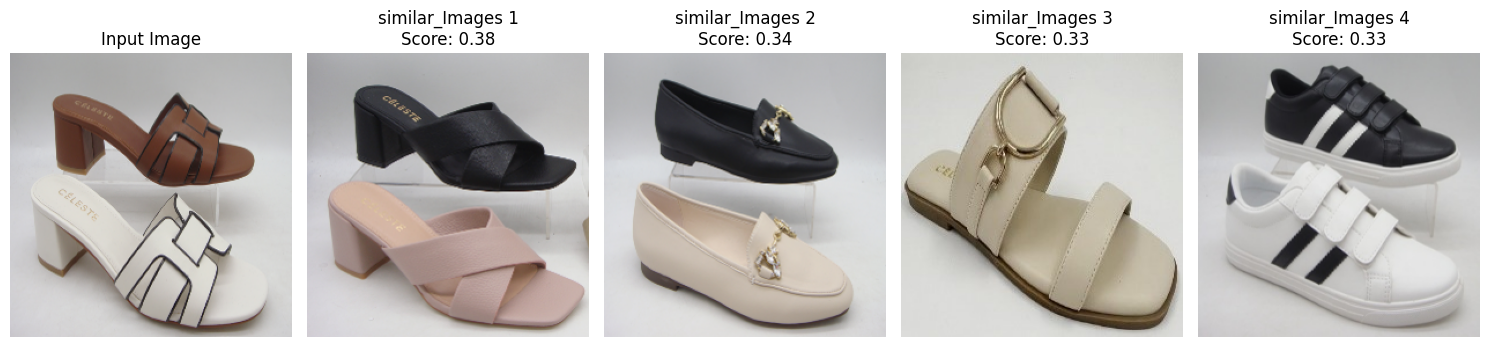

In [ ]:
# Example input image path
input_image_path = '/content/drive/MyDrive/Fashion_Data/block heels/1708339068731.png'
recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=4)


1/1 [==============================] - 0s 491ms/step


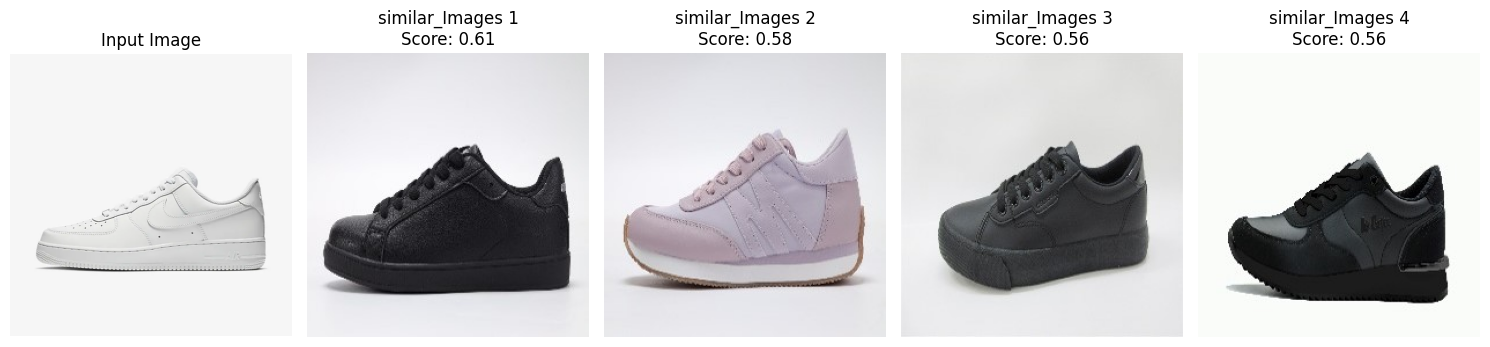

In [ ]:
# Example input image path
input_image_path = '/content/drive/MyDrive/test_image/air-force-1-07-shoes-WrLlWX.png'
recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=4)


1/1 [==============================] - 1s 814ms/step


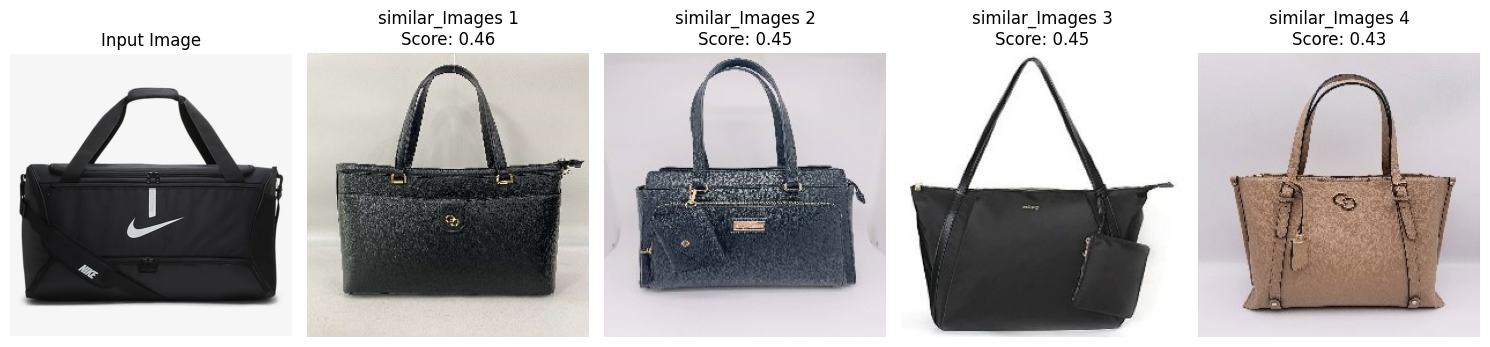

In [ ]:
# Example input image path
input_image_path = '/content/drive/MyDrive/test_image/academy-team-football-duffel-bag-n2NvdL.png'
recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=4)


1/1 [==============================] - 1s 869ms/step


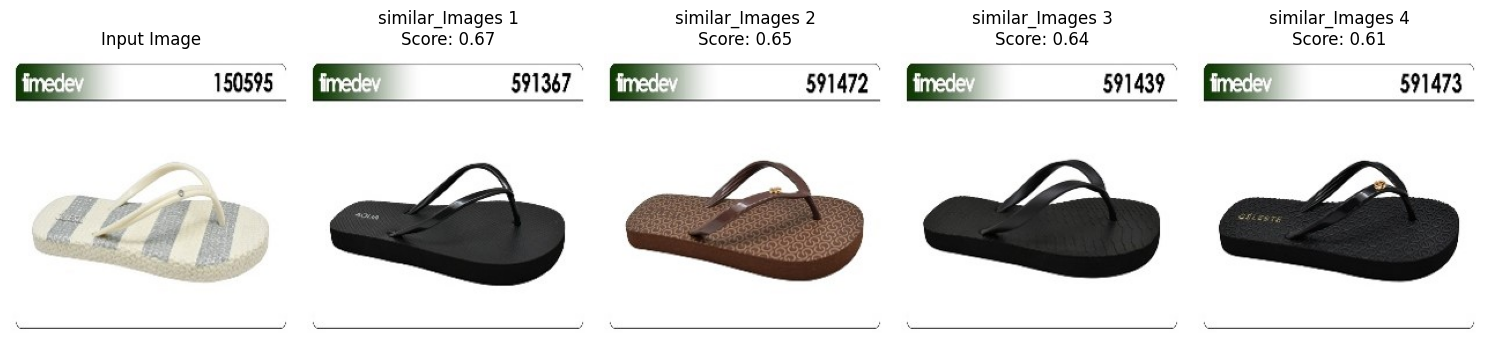

In [ ]:
# Example input image path
input_image_path = '/content/drive/MyDrive/Fashion_Data/slippers/150595-1.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=4)


In [ ]:
###########Using Resnet50

In [ ]:
from zipfile import ZipFile
import os

# Paths to the zip file and the extraction directory
zip_file_path = '/content/drive/MyDrive/Footwear.zip'
extraction_directory = '/content/drive/MyDrive/Footwear/'

# Create the extraction directory if it does not exist
if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

# Extract the zip file
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

# List the extracted files
extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

# Correct the path to include the 'Footwear' directory and list its contents
extraction_directory_updated = os.path.join(extraction_directory, 'Footwear')
extracted_files_updated = os.listdir(extraction_directory_updated)
print(extracted_files_updated[:10], len(extracted_files_updated))


['Footwear']
['02109.jpg', '1151250A_WHITE.jpg', '0363.jpg', '1155104A_Black_MISSY_DVP.jpg', '1080917A_BEIGE.jpg', '1051520A_NUDE_ELLE_DVP.jpg', '1157105A_BURGUNDY.jpg', '1152650A_WHITE_MISSY_DVP.jpg', '1156612A_WHITE.jpg', '1055211A_BEIGE.jpg'] 395


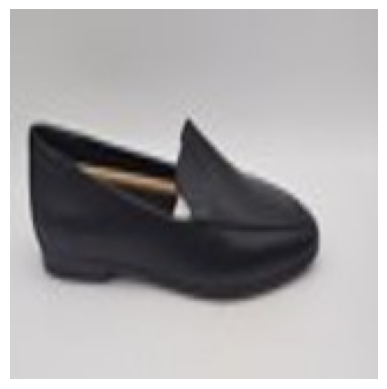

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Function to load and display an image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Display the first image
first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[0])
display_image(first_image_path)


In [ ]:
import glob

# Directory path containing your images
image_directory = extraction_directory_updated

# List all image file paths
image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# Print the list of image file paths
print(image_paths_list)


['/content/drive/MyDrive/Footwear/Footwear/02109.jpg', '/content/drive/MyDrive/Footwear/Footwear/1151250A_WHITE.jpg', '/content/drive/MyDrive/Footwear/Footwear/0363.jpg', '/content/drive/MyDrive/Footwear/Footwear/1155104A_Black_MISSY_DVP.jpg', '/content/drive/MyDrive/Footwear/Footwear/1080917A_BEIGE.jpg', '/content/drive/MyDrive/Footwear/Footwear/1051520A_NUDE_ELLE_DVP.jpg', '/content/drive/MyDrive/Footwear/Footwear/1157105A_BURGUNDY.jpg', '/content/drive/MyDrive/Footwear/Footwear/1152650A_WHITE_MISSY_DVP.jpg', '/content/drive/MyDrive/Footwear/Footwear/1156612A_WHITE.jpg', '/content/drive/MyDrive/Footwear/Footwear/1055211A_BEIGE.jpg', '/content/drive/MyDrive/Footwear/Footwear/1116902C_OFF_WHITE_LEE_COOPER_DVP.jpg', '/content/drive/MyDrive/Footwear/Footwear/1210016A_OFF__WHITE_LILAC_LEE_COOPER__DVP.jpg', '/content/drive/MyDrive/Footwear/Footwear/123AL3733NUDE.jpg', '/content/drive/MyDrive/Footwear/Footwear/1211903A_WHITE_LEE_COOPER_DVP.jpg', '/content/drive/MyDrive/Footwear/Footwear/121

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import os

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to preprocess an image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

# Function to extract features from an image
def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

# Extract features for all images and store them
all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))


1/1 [==============================] - 0s 388ms/step


KeyboardInterrupt: 

In [ ]:
from scipy.spatial.distance import cosine

# Function to recommend similar images based on cosine similarity
def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=4):
    # Preprocess the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # Calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n-1:-1][::-1]

    # Display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # Display similar images
    for i, idx in enumerate(similar_indices, start=1):
        image_path = os.path.join(image_directory, all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"similar_Images {i}\nScore: {similarities[idx]:.2f}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()



1/1 [==============================] - 0s 177ms/step


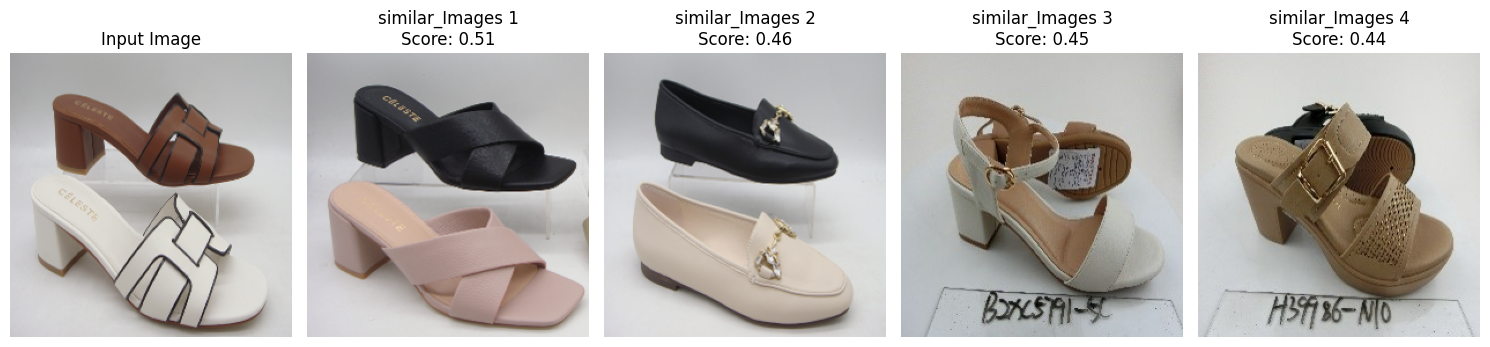

In [ ]:
# Example input image path
input_image_path = '/content/drive/MyDrive/Fashion_Data/block heels/1708339068731.png'
recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=4)


1/1 [==============================] - 0s 178ms/step


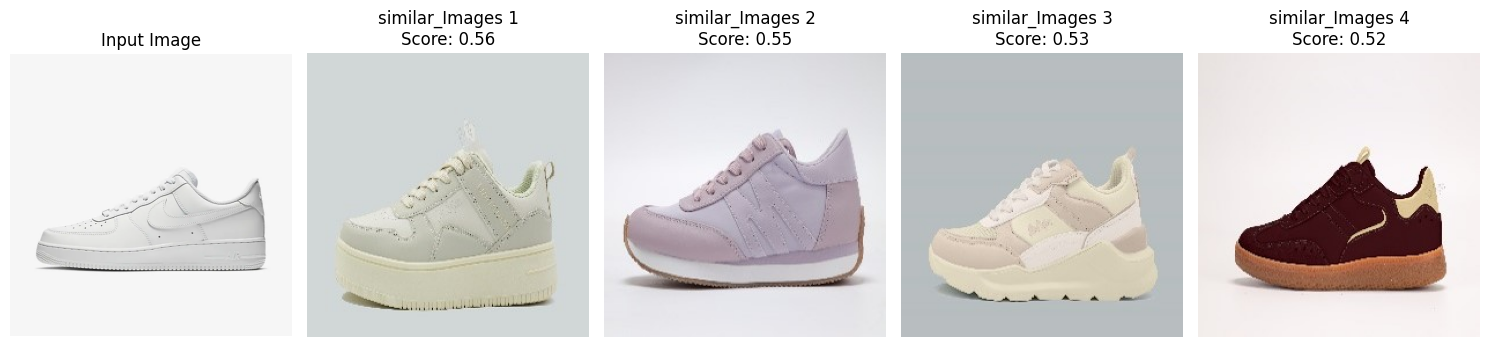

In [ ]:
# Example input image path
input_image_path = '/content/drive/MyDrive/test_image/air-force-1-07-shoes-WrLlWX.png'
recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=4)


1/1 [==============================] - 1s 526ms/step


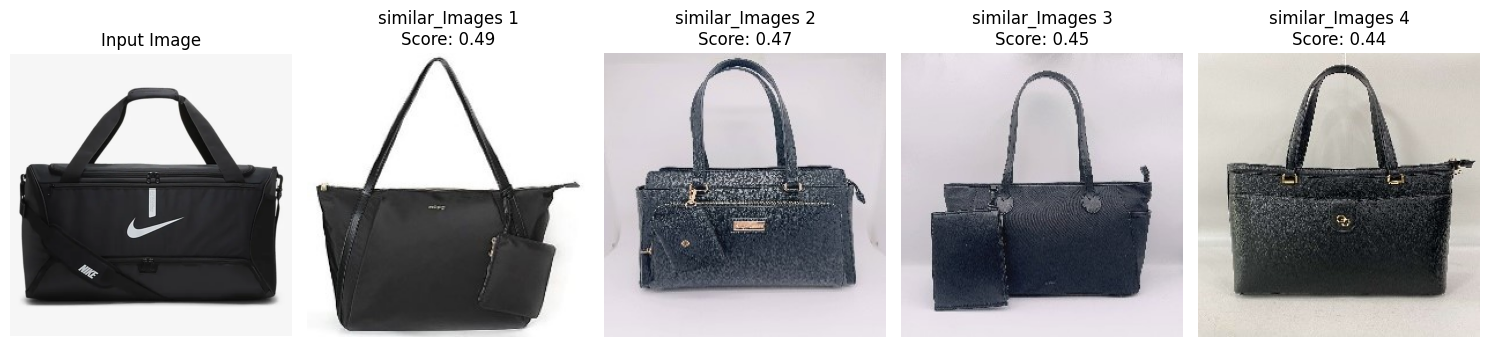

In [ ]:
# Example input image path
input_image_path = '/content/drive/MyDrive/test_image/academy-team-football-duffel-bag-n2NvdL.png'
recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=4)


In [ ]:
##############Use (224,224,3)

In [ ]:
######### After Adding Augmentation

In [ ]:
from zipfile import ZipFile
import os

# Paths to the zip file and the extraction directory
zip_file_path = '/content/drive/MyDrive/Footwear.zip'
extraction_directory = '/content/drive/MyDrive/Footwear/'

# Create the extraction directory if it does not exist
if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

# Extract the zip file
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

# List the extracted files
extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])  # Display the first 10 extracted files or directories

# Update the path to include the 'Footwear' directory if it exists
extraction_directory_updated = os.path.join(extraction_directory, 'Footwear')
if os.path.exists(extraction_directory_updated):
    extracted_files_updated = os.listdir(extraction_directory_updated)
    print(extracted_files_updated[:10], len(extracted_files_updated))  # Display first 10 files and count
else:
    extracted_files_updated = extracted_files
    print(extracted_files[:10], len(extracted_files))


['Footwear']
['02109.jpg', '0363.jpg', '1116902C_OFF_WHITE_LEE_COOPER_DVP.jpg', '1152650A_WHITE_MISSY_DVP.jpg', '1156612A_WHITE.jpg', '1155104A_Black_MISSY_DVP.jpg', '1157105A_BURGUNDY.jpg', '1151250A_WHITE.jpg', '1080917A_BEIGE.jpg', '1055211A_BEIGE.jpg'] 395


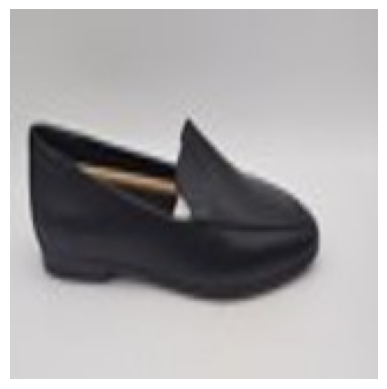

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Function to load and display an image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Display the first image (assuming 'Footwear' directory exists)
if len(extracted_files_updated) > 0:
    first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[0])
    display_image(first_image_path)
else:
    print("No images found to display.")


In [ ]:
pip install matplotlib Pillow


In [ ]:
import glob

# Directory path containing your images
image_directory = extraction_directory_updated

# List all image file paths
image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# Print the list of image file paths
print(image_paths_list[:10])  # Display the first 10 image file paths


['/content/drive/MyDrive/Footwear/Footwear/02109.jpg', '/content/drive/MyDrive/Footwear/Footwear/0363.jpg', '/content/drive/MyDrive/Footwear/Footwear/1116902C_OFF_WHITE_LEE_COOPER_DVP.jpg', '/content/drive/MyDrive/Footwear/Footwear/1152650A_WHITE_MISSY_DVP.jpg', '/content/drive/MyDrive/Footwear/Footwear/1156612A_WHITE.jpg', '/content/drive/MyDrive/Footwear/Footwear/1155104A_Black_MISSY_DVP.jpg', '/content/drive/MyDrive/Footwear/Footwear/1157105A_BURGUNDY.jpg', '/content/drive/MyDrive/Footwear/Footwear/1151250A_WHITE.jpg', '/content/drive/MyDrive/Footwear/Footwear/1080917A_BEIGE.jpg', '/content/drive/MyDrive/Footwear/Footwear/1055211A_BEIGE.jpg']


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)


In [ ]:
# Function to preprocess an image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

# Function to extract features from an image
def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

# Extract features for all images and store them
all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

print(f"Extracted features for {len(all_features)} images.")


1/1 [==============================] - 0s 474ms/step
Extracted features for 388 images.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to augment and preprocess an image
def augment_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    augmented_images = [datagen.random_transform(img_array[0]) for _ in range(5)]
    preprocessed_images = [preprocess_input(np.expand_dims(aug_img, axis=0)) for aug_img in augmented_images]
    return preprocessed_images

# Extract features for all images including augmented versions and store them
augmented_features = []
augmented_image_names = []

for img_path in image_paths_list:
    preprocessed_images = augment_and_preprocess_image(img_path)
    for preprocessed_img in preprocessed_images:
        features = extract_features(model, preprocessed_img)
        augmented_features.append(features)
        augmented_image_names.append(os.path.basename(img_path))

print(f"Extracted features for {len(augmented_features)} augmented images.")


1/1 [==============================] - 1s 856ms/step
Extracted features for 1940 augmented images.


In [ ]:
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
from PIL import Image

# Function to recommend similar images based on cosine similarity
def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=4):
    # Preprocess the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # Calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n-1:-1][::-1]

    # Display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # Display similar images
    for i, idx in enumerate(similar_indices, start=1):
        image_path = os.path.join(image_directory, all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Similar Image {i}\nScore: {similarities[idx]:.2f}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()




1/1 [==============================] - 1s 509ms/step


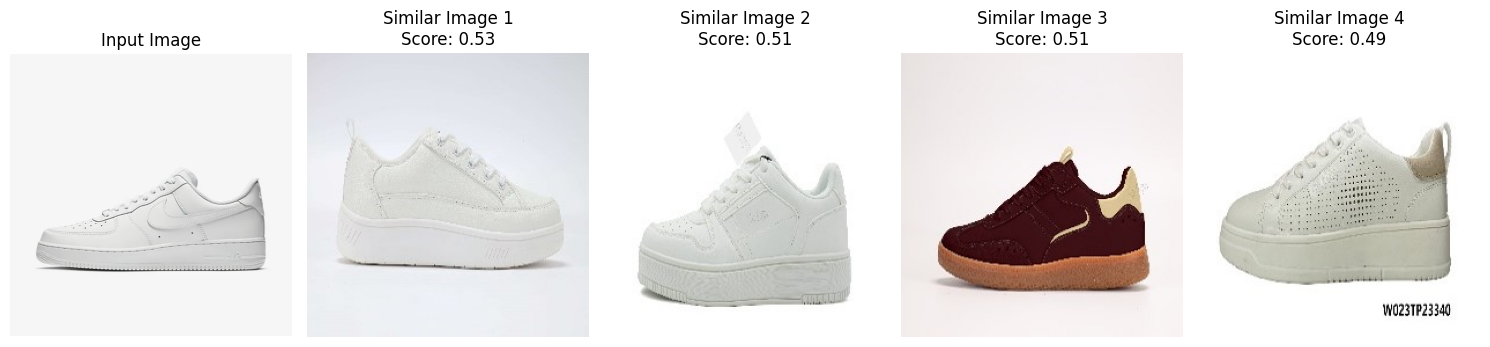

In [ ]:
# Example input image path
input_image_path = '/content/drive/MyDrive/test_image/air-force-1-07-shoes-WrLlWX.png'
recommend_fashion_items_cnn(input_image_path, augmented_features, augmented_image_names, model, top_n=4)

1/1 [==============================] - 1s 504ms/step


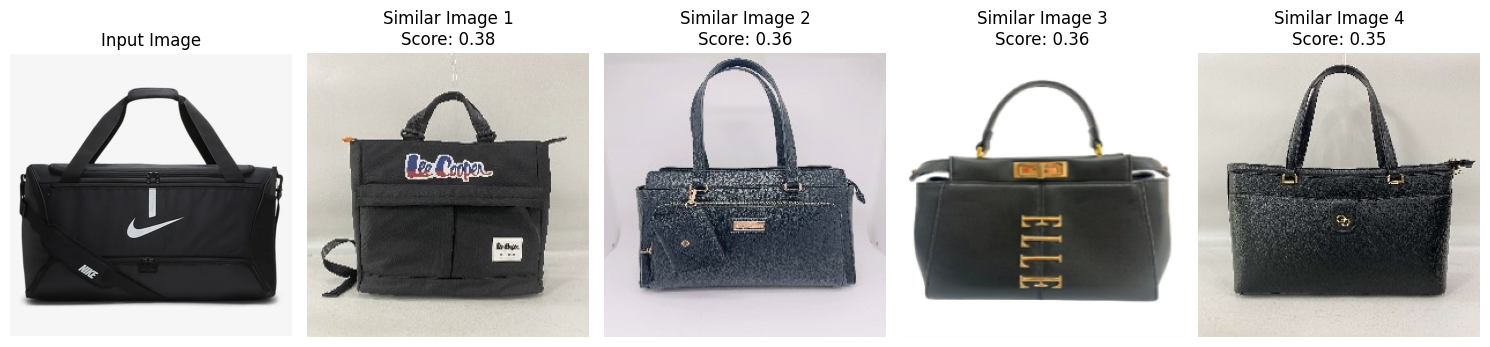

In [ ]:
# Example input image path
input_image_path = '/content/drive/MyDrive/test_image/academy-team-football-duffel-bag-n2NvdL.png'
recommend_fashion_items_cnn(input_image_path, augmented_features, augmented_image_names, model, top_n=4)


1/1 [==============================] - 0s 475ms/step


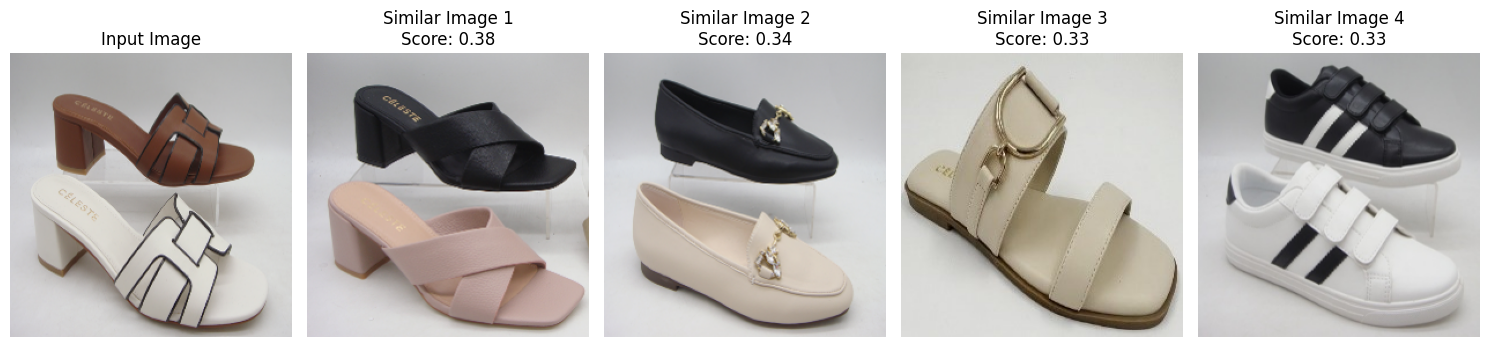

In [ ]:
# Example input image path
input_image_path = '/content/drive/MyDrive/Fashion_Data/block heels/1708339068731.png'
recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=4)


In [ ]:
pip install matplotlib Pillow tensorflow


1/1 [==============================] - 2s 2s/step


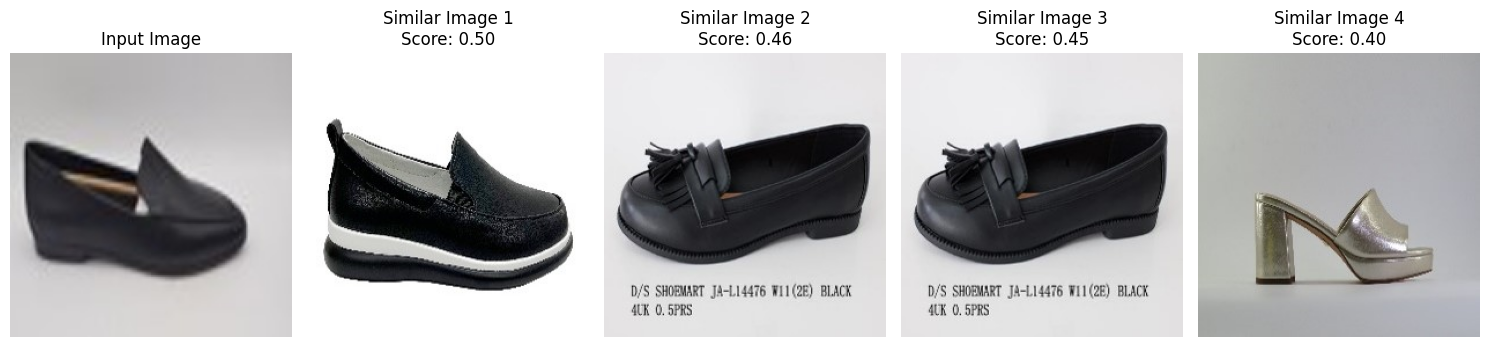

1/1 [==============================] - 1s 894ms/step


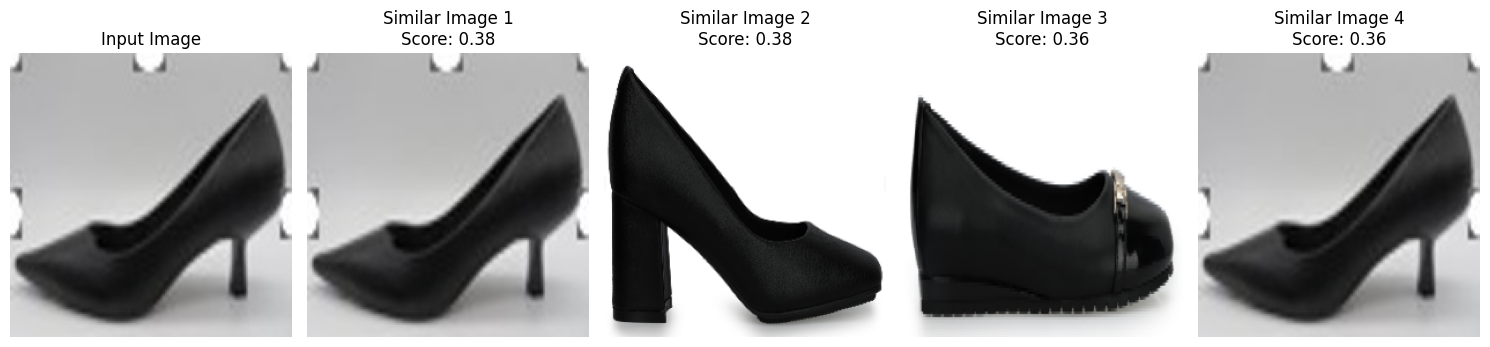

1/1 [==============================] - 1s 1s/step


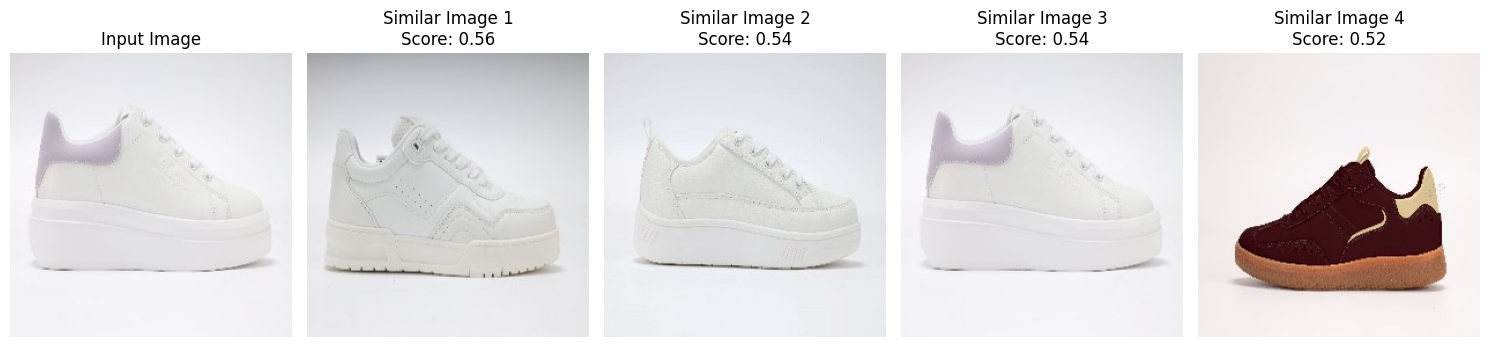

1/1 [==============================] - 1s 1s/step


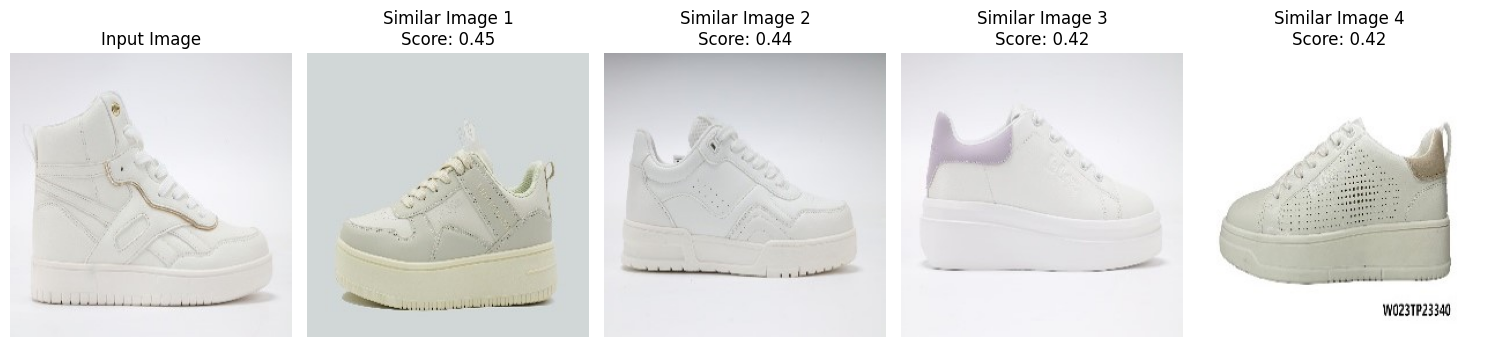

1/1 [==============================] - 2s 2s/step


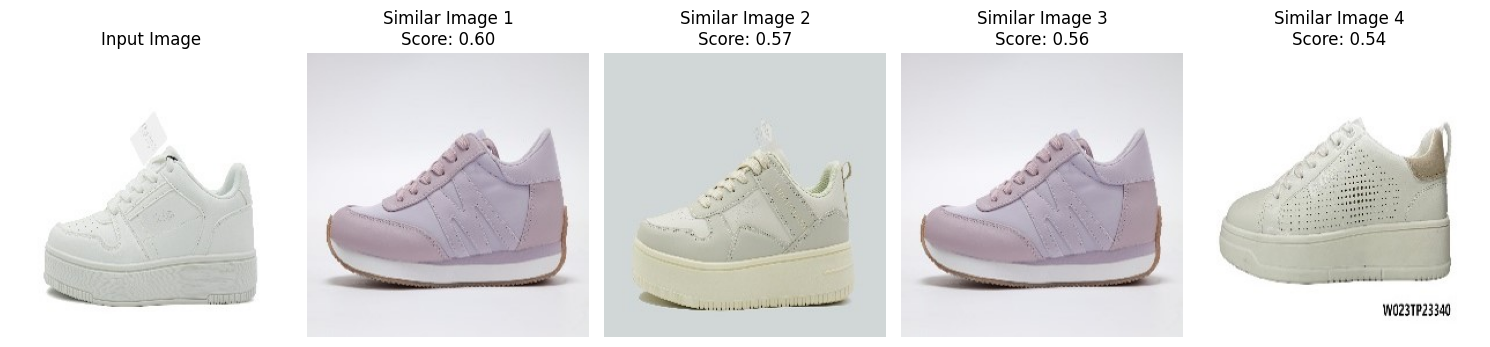

1/1 [==============================] - 1s 822ms/step


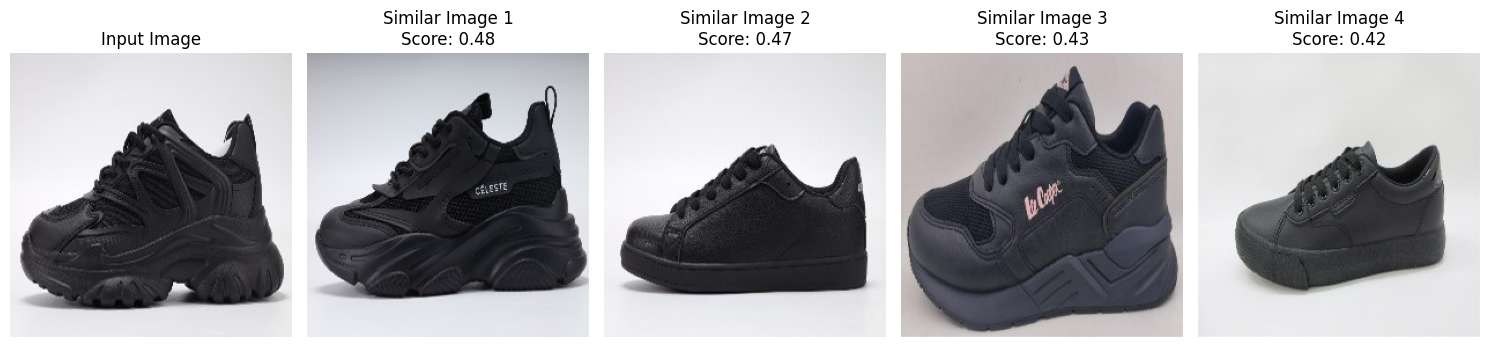

1/1 [==============================] - 1s 506ms/step


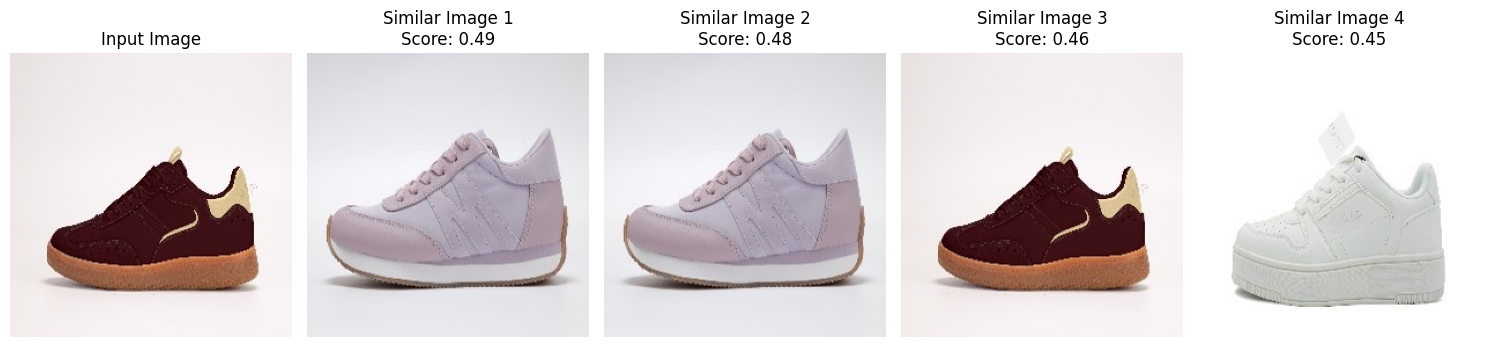

1/1 [==============================] - 0s 482ms/step


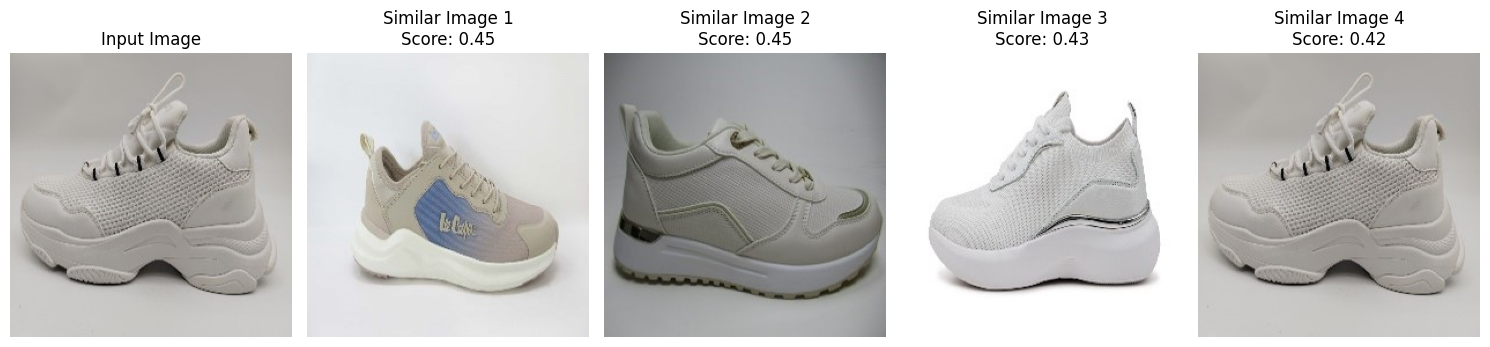

1/1 [==============================] - 1s 526ms/step


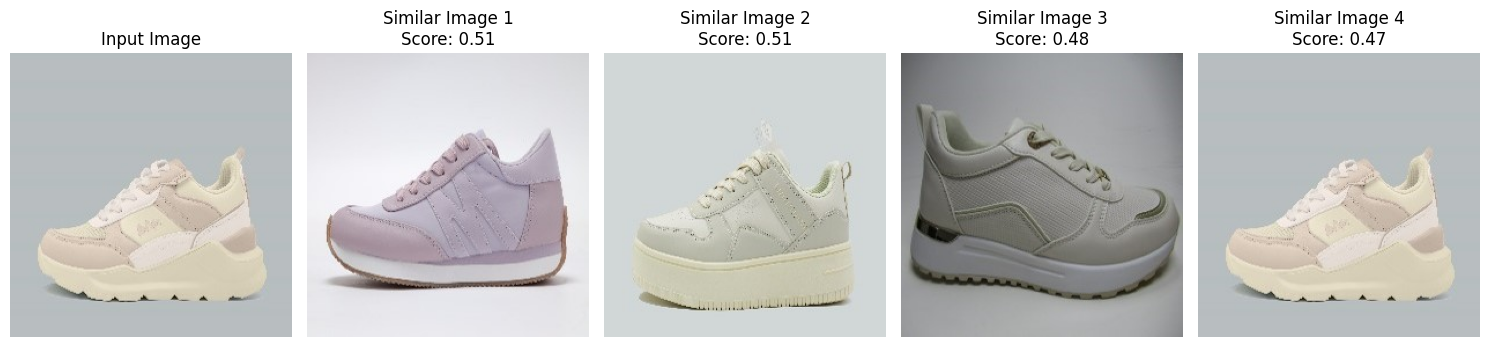

1/1 [==============================] - 1s 509ms/step


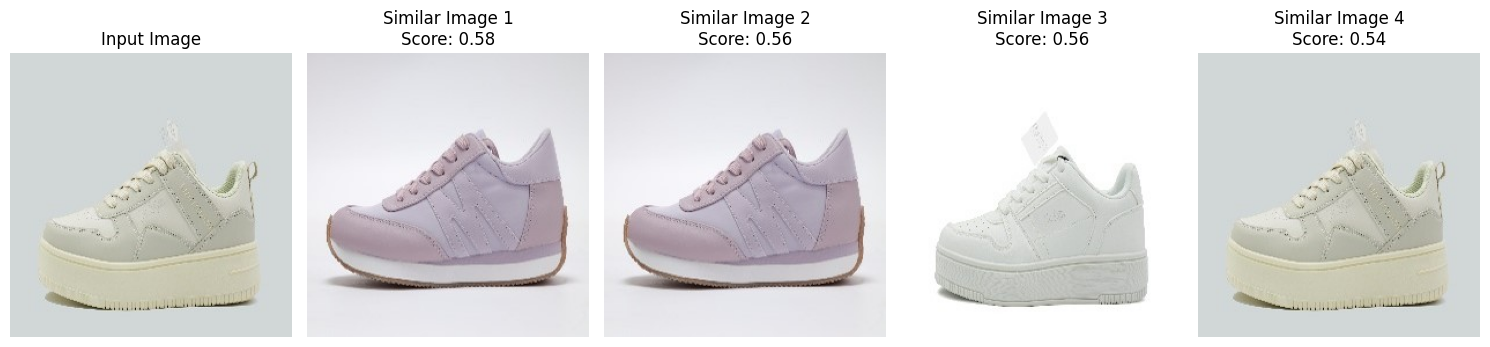

Evaluation Accuracy: 0.60


In [ ]:
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Function to recommend similar images based on cosine similarity
def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=4):
    # Preprocess the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # Calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n-1:-1][::-1]

    # Display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # Display similar images
    for i, idx in enumerate(similar_indices, start=1):
        image_path = os.path.join(image_directory, all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Similar Image {i}\nScore: {similarities[idx]:.2f}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Function to evaluate model performance
def evaluate_model(image_paths, model, all_features, all_image_names, top_n=4):
    # Select a subset of images for evaluation (e.g., the first 10 images)
    subset_image_paths = image_paths[:10]
    total_correct = 0
    total_images = len(subset_image_paths)

    for img_path in subset_image_paths:
        preprocessed_img = preprocess_image(img_path)
        input_features = extract_features(model, preprocessed_img)

        # Calculate similarities and find the top N similar images
        similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
        similar_indices = np.argsort(similarities)[-top_n-1:-1][::-1]

        # Display the input image
        plt.figure(figsize=(15, 10))
        plt.subplot(1, top_n + 1, 1)
        plt.imshow(Image.open(img_path))
        plt.title("Input Image")
        plt.axis('off')

        # Display similar images
        for i, idx in enumerate(similar_indices, start=1):
            image_path = os.path.join(image_directory, all_image_names[idx])
            plt.subplot(1, top_n + 1, i + 1)
            plt.imshow(Image.open(image_path))
            plt.title(f"Similar Image {i}\nScore: {similarities[idx]:.2f}")
            plt.axis('off')

        plt.tight_layout()
        plt.show()

        # Check if correct image is in the top N similar images
        correct_image_name = os.path.basename(img_path)
        recommended_image_names = [all_image_names[idx] for idx in similar_indices]
        if correct_image_name in recommended_image_names:
            total_correct += 1

    accuracy = total_correct / total_images
    print(f"Evaluation Accuracy: {accuracy:.2f}")

# Evaluate the model
evaluate_model(image_paths_list, model, augmented_features, augmented_image_names, top_n=4)
